In [1]:
import pandas as pd
import numpy as np

# sep="" : 区切り文字の設定
wine = pd.read_csv("winequality-red.csv",sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

# loc[行,列] : [:,列]で行固定の列指定抽出
# loc[行番号,列番号]
# as_matrix ダメよ → values()
# values : numpy配列で取得する
X = wine.loc[:, ['density']]
Y = wine["alcohol"]
X,Y

(      density
 0     0.99780
 1     0.99680
 2     0.99700
 3     0.99800
 4     0.99780
 ...       ...
 1594  0.99490
 1595  0.99512
 1596  0.99574
 1597  0.99547
 1598  0.99549
 
 [1599 rows x 1 columns],
 0        9.4
 1        9.8
 2        9.8
 3        9.8
 4        9.4
         ... 
 1594    10.5
 1595    11.2
 1596    11.0
 1597    10.2
 1598    11.0
 Name: alcohol, Length: 1599, dtype: float64)

In [8]:
clf.fit(X,Y)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X,Y))

[-280.16382307]
289.67534338256445
0.2461943643971065


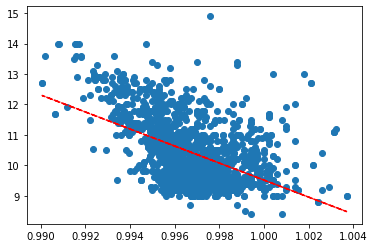

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.plot(X,clf.predict(X),linestyle="dashed",color="r")

In [12]:
#重回帰分析

#説明変数にqualityいがい全てを利用
X = wine.drop("quality",axis=1)
Y = wine["quality"]

clf.fit(X,Y)
print(pd.DataFrame({"NAME":X.columns,
                     "Coefficients":clf.coef_}).sort_values(by="Coefficients"))

print(clf.intercept_)

                    NAME  Coefficients
7                density    -17.881164
4              chlorides     -1.874225
1       volatile acidity     -1.083590
8                     pH     -0.413653
2            citric acid     -0.182564
6   total sulfur dioxide     -0.003265
5    free sulfur dioxide      0.004361
3         residual sugar      0.016331
0          fixed acidity      0.024991
10               alcohol      0.276198
9              sulphates      0.916334
21.96520844945205


In [13]:
# データフレームの各列を正規化
wine2 = wine.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
wine2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.081384,0.117931,-0.270976,-0.043754,-0.019143,-0.068661,-0.044056,0.077336,0.156604,-0.058772,-0.157382,-0.127205
1,-0.045986,0.241219,-0.270976,0.004191,0.017585,0.128522,0.072552,0.003915,-0.087491,0.013085,-0.095844,-0.127205
2,-0.045986,0.159027,-0.230976,-0.016357,0.007568,-0.012323,0.026616,0.018599,-0.040247,-0.004880,-0.095844,-0.127205
3,0.254899,-0.169740,0.289024,-0.043754,-0.020812,0.015846,0.047817,0.092021,-0.118987,-0.046796,-0.095844,0.072795
4,-0.081384,0.117931,-0.270976,-0.043754,-0.019143,-0.068661,-0.044056,0.077336,0.156604,-0.058772,-0.157382,-0.127205


In [15]:
X_2 = wine2.drop("quality",axis=1)
Y_2 = wine2["quality"]

clf.fit(X_2,Y_2)
# 偏回帰係数
print(pd.DataFrame({"Name":X.columns,
                    "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)
# R^2 決定係数
print(clf.score(X_2,Y_2))

                    Name  Coefficients
2            citric acid      0.036513
3         residual sugar      0.047687
7                density      0.048708
0          fixed acidity      0.056479
5    free sulfur dioxide      0.061931
8                     pH      0.105068
6   total sulfur dioxide      0.184775
4              chlorides      0.224532
9              sulphates      0.306056
1       volatile acidity      0.316408
10               alcohol      0.359057
1.270155865645086e-15
0.3605517030386882
